In [1]:
import cv2
import numpy as np
import math
from math import sin,cos,radians
import sys
import matplotlib.pyplot as plt

import sys
#Move to parent folder
sys.path.insert(0, '../croprows-cli/src/')

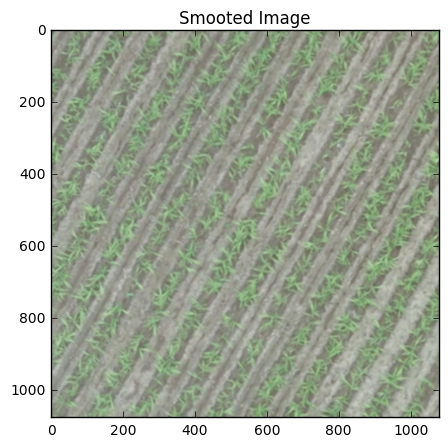

In [2]:
img = cv2.imread("../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/mosaic-cl_3-rw_2.jpg")
img_smooth = cv2.GaussianBlur(img,(7,7),3)  #Gaussian filter to make image smooth

plt.figure(figsize=(5, 5))
plt.title("Smooted Image")
plt.imshow(img_smooth)
plt.show()

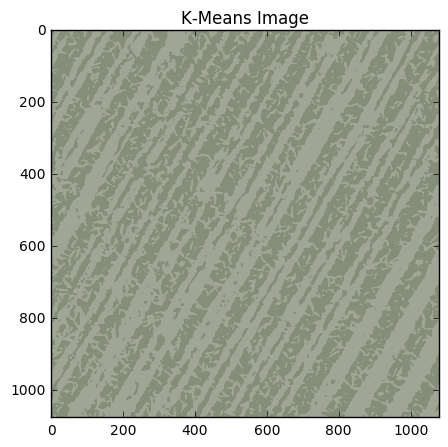

In [3]:
Z = img_smooth.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img_smooth.shape))

plt.figure(figsize=(5, 5))
plt.title("K-Means Image")
plt.imshow(res2)
plt.show()

